In [8]:
%matplotlib inline
from keras import layers
from keras import models
from keras import losses
from keras import optimizers
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt

### Dados

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [3]:
X_train = train_images[:6000, :, :]
X_train_labels = train_labels[:6000, :]

X_valid = train_images[6000:7000, :, :]
X_valid_labels= train_labels[6000:7000, :]

X_test = test_images[:1000, :, :]
X_test_labels = test_labels[:1000, :]

In [4]:
print(X_train.shape)

(6000, 28, 28, 1)


In [5]:
print(X_train_labels.shape)

(6000, 10)


In [38]:
def plotFigureHistory(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'r', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

### Questão 01

In [58]:
def calculateModel(funcl,opt):
    model = models.Sequential()
    model.add(layers.Conv2D(filters= 32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(units= 64, activation='relu'))
    model.add(layers.Dense(units=10, activation='softmax'))
    
    model.compile(optimizer=opt, loss=funcl, metrics=['accuracy'])
    history = model.fit(X_train, X_train_labels, epochs=10, batch_size=64, 
                          validation_data=(X_valid, X_valid_labels))
    
    model_loss, model_acc = model.evaluate(X_test, X_test_labels)
    print('Loss: {} | Accuracy: {}'.format(model_loss, model_acc))
    
    plotFigureHistory(history)

#### Loss: mean_squared_error | Optimizer: SGD

Train on 6000 samples, validate on 1000 samples
Epoch 1/10
6000/6000 [==============================] - 3s 549us/step - loss: 0.0901 - acc: 0.1040 - val_loss: 0.0900 - val_acc: 0.1020
Epoch 2/10
6000/6000 [==============================] - 3s 529us/step - loss: 0.0901 - acc: 0.1065 - val_loss: 0.0900 - val_acc: 0.1060
Epoch 3/10
6000/6000 [==============================] - 3s 478us/step - loss: 0.0900 - acc: 0.1067 - val_loss: 0.0900 - val_acc: 0.1060
Epoch 4/10
6000/6000 [==============================] - 3s 538us/step - loss: 0.0900 - acc: 0.1090 - val_loss: 0.0900 - val_acc: 0.1110
Epoch 5/10
6000/6000 [==============================] - 3s 496us/step - loss: 0.0900 - acc: 0.1103 - val_loss: 0.0899 - val_acc: 0.1140
Epoch 6/10
6000/6000 [==============================] - 3s 520us/step - loss: 0.0900 - acc: 0.1120 - val_loss: 0.0899 - val_acc: 0.1160
Epoch 7/10
6000/6000 [==============================] - 3s 550us/step - loss: 0.0900 - acc: 0.1133 - val_loss: 0.0899 - val_acc: 0.1150


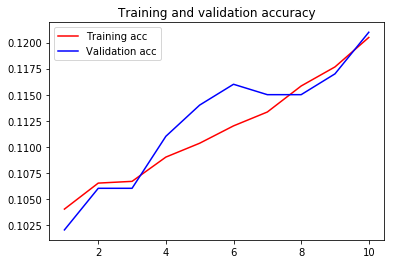

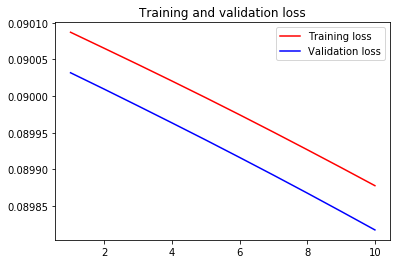

In [59]:
calculateModel(funcl=losses.mean_squared_error,opt=optimizers.SGD())

#### Loss: mean_squared_error | Optimizer: Adagrad

Train on 6000 samples, validate on 1000 samples
Epoch 1/10
6000/6000 [==============================] - 4s 591us/step - loss: 0.0382 - acc: 0.7248 - val_loss: 0.0162 - val_acc: 0.8920
Epoch 2/10
6000/6000 [==============================] - 3s 476us/step - loss: 0.0114 - acc: 0.9253 - val_loss: 0.0091 - val_acc: 0.9400
Epoch 3/10
6000/6000 [==============================] - 3s 479us/step - loss: 0.0081 - acc: 0.9498 - val_loss: 0.0064 - val_acc: 0.9600
Epoch 4/10
6000/6000 [==============================] - 3s 510us/step - loss: 0.0058 - acc: 0.9653 - val_loss: 0.0067 - val_acc: 0.9600
Epoch 5/10
6000/6000 [==============================] - 3s 504us/step - loss: 0.0050 - acc: 0.9677 - val_loss: 0.0063 - val_acc: 0.9600
Epoch 6/10
6000/6000 [==============================] - 3s 528us/step - loss: 0.0040 - acc: 0.9745 - val_loss: 0.0065 - val_acc: 0.9590
Epoch 7/10
6000/6000 [==============================] - 3s 494us/step - loss: 0.0032 - acc: 0.9808 - val_loss: 0.0049 - val_acc: 0.9690


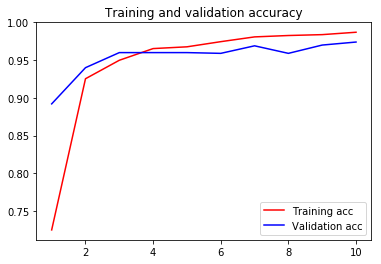

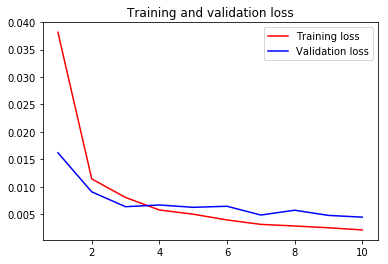

In [64]:
calculateModel(funcl=losses.mean_squared_error,opt=optimizers.Adamax())

#### Loss: mean_squared_error | Optimizer: Nadam

Train on 6000 samples, validate on 1000 samples
Epoch 1/10
6000/6000 [==============================] - 4s 625us/step - loss: 0.0587 - acc: 0.6127 - val_loss: 0.0378 - val_acc: 0.7920
Epoch 2/10
6000/6000 [==============================] - 3s 535us/step - loss: 0.0177 - acc: 0.8943 - val_loss: 0.0097 - val_acc: 0.9410
Epoch 3/10
6000/6000 [==============================] - 3s 484us/step - loss: 0.0089 - acc: 0.9432 - val_loss: 0.0062 - val_acc: 0.9600
Epoch 4/10
6000/6000 [==============================] - 3s 539us/step - loss: 0.0061 - acc: 0.9617 - val_loss: 0.0052 - val_acc: 0.9680
Epoch 5/10
6000/6000 [==============================] - 3s 476us/step - loss: 0.0050 - acc: 0.9683 - val_loss: 0.0060 - val_acc: 0.9610
Epoch 6/10
6000/6000 [==============================] - 3s 576us/step - loss: 0.0039 - acc: 0.9762 - val_loss: 0.0050 - val_acc: 0.9690
Epoch 7/10
6000/6000 [==============================] - 3s 486us/step - loss: 0.0040 - acc: 0.9760 - val_loss: 0.0062 - val_acc: 0.9600


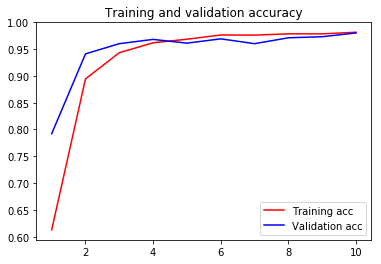

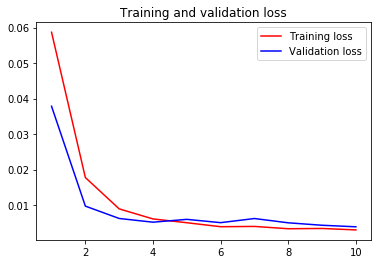

In [63]:
calculateModel(funcl=losses.mean_squared_error,opt=optimizers.Nadam())